quiero comprobar que el metodo lasso elimina los terminos de grados mayores a 1 en el caso de un origen lineal

In [6]:
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split

# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures

# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import LassoCV

# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

In [7]:
# polinomial
mu, sigma = 2, 0.9
x = np.random.normal(mu, sigma, 100)
y = np.random.normal(loc=x, scale=0.3)
y_p = np.random.normal(loc=x**2, scale=0.7)

In [ ]:
# independiet vars
mu, sigma = 2, 0.9
x1 = np.random.normal(mu, sigma, 100)
x2 = np.random.normal(mu, sigma, 100)
y = np.random.normal(loc=4+x1-2*x2, scale=0.7)

In [ ]:
# collinearity.
mu, sigma = 2, 0.9
x1 = np.random.normal(mu, sigma, 100)
x2 = np.random.normal(loc=x, scale=0.3)
y = np.random.normal(loc=x1+x2, scale=0.7)

<IPython.core.display.Javascript object>


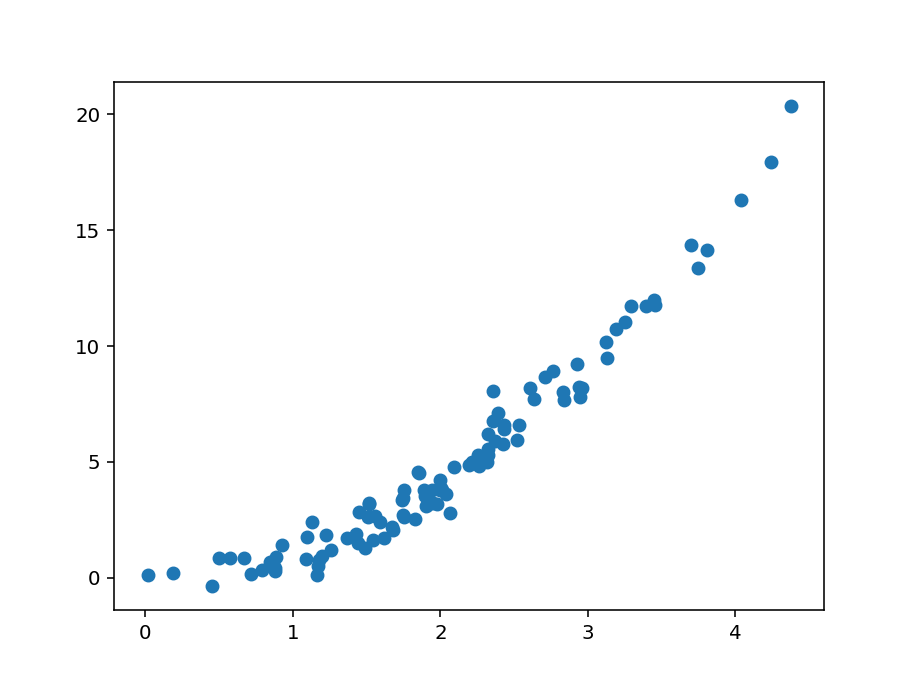

In [8]:
plt.scatter(x,y_p)

In [9]:
n = 3
alpha = 10
poly = PolynomialFeatures(degree=n, include_bias=False)
X_poly = poly.fit_transform(x.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)
linlasso = Lasso(alpha=alpha).fit(X_train, y_train)

In [10]:
for alpha in np.arange(0,1,0.01):
    print(f"alpha={alpha}")
    linridge = Ridge(alpha=alpha).fit(X_train, y_train)
    print('ridge regression linear model intercept: {}'
         .format(linridge.intercept_))
    print('ridge regression linear model coeff:\n{}'
         .format(linridge.coef_))
    print('R-squared score (training): {:.3f}'
         .format(linridge.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(linridge.score(X_test, y_test)))
    print('------')

alpha=0.0
ridge regression linear model intercept: -0.6101679908048792
ridge regression linear model coeff:
[ 1.87022215 -0.3784853   0.05270134]
R-squared score (training): 0.917
R-squared score (test): 0.884
------
alpha=0.01
ridge regression linear model intercept: -0.5898834483438877
ridge regression linear model coeff:
[ 1.83411985 -0.36109069  0.05027953]
R-squared score (training): 0.917
R-squared score (test): 0.886
------
alpha=0.02
ridge regression linear model intercept: -0.5704549103335226
ridge regression linear model coeff:
[ 1.79955136 -0.34443868  0.04796148]
R-squared score (training): 0.917
R-squared score (test): 0.887
------
alpha=0.03
ridge regression linear model intercept: -0.5518289142225683
ridge regression linear model coeff:
[ 1.76642087 -0.32848288  0.04574069]
R-squared score (training): 0.917
R-squared score (test): 0.888
------
alpha=0.04
ridge regression linear model intercept: -0.5339563589890326
ridge regression linear model coeff:
[ 1.7346404  -0.3131

In [11]:
for alpha in np.arange(0,1,0.01):
    print(f"alpha={alpha}")
    linlasso = Lasso(alpha=alpha).fit(X_train, y_train)
    print('ridge regression linear model intercept: {}'
         .format(linlasso.intercept_))
    print('ridge regression linear model coeff:\n{}'
         .format(linlasso.coef_))
    print('R-squared score (training): {:.3f}'
         .format(linlasso.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(linlasso.score(X_test, y_test)))
    print('------')

alpha=0.0
ridge regression linear model intercept: -0.5648647082508642
ridge regression linear model coeff:
[ 1.78606771 -0.33671216  0.04676196]
R-squared score (training): 0.917
R-squared score (test): 0.887
------
alpha=0.01
ridge regression linear model intercept: -0.131800081119402
ridge regression linear model coeff:
[  1.05372048e+00   3.04377574e-03   7.45179284e-04]
R-squared score (training): 0.912
R-squared score (test): 0.901
------
alpha=0.02
ridge regression linear model intercept: 0.11922339737673937
ridge regression linear model coeff:
[ 0.68225398  0.15497084 -0.01758604]
R-squared score (training): 0.907
R-squared score (test): 0.900
------
alpha=0.03
ridge regression linear model intercept: 0.4608760592477421
ridge regression linear model coeff:
[ 0.13107416  0.40045144 -0.04970874]
R-squared score (training): 0.895
R-squared score (test): 0.885
------
alpha=0.04
ridge regression linear model intercept: 0.5628735998784467
ridge regression linear model coeff:
[ 0.    

/home/maal8012/anaconda3/envs/aiNielsenCol/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/home/maal8012/anaconda3/envs/aiNielsenCol/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/maal8012/anaconda3/envs/aiNielsenCol/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/maal8012/anaconda3/envs/aiNielsenCol/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not c

## Time series decompose 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(ts_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid